In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Activation, Flatten, Dropout

%matplotlib inline

Using TensorFlow backend.


In [2]:
# load train and test data
train = pd.read_csv('../input/Fashion_MNIST/fashion-mnist_train.csv')
test = pd.read_csv('../input/Fashion_MNIST/fashion-mnist_test.csv')

In [3]:
test.head()
# train.shape

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# get X/Y train/test
Xtrain = train.drop(columns='label')
Ytrain = train['label']
Xtest = test.drop(columns='label')
Ytest = test['label']

print('Xtrain shape: ', Xtrain.shape)
print('Ytrain shape: ', Ytrain.shape)
print('Xtest shape : ', Xtest.shape)
print('Ytest shape : ', Ytest.shape)

Xtrain shape:  (60000, 784)
Ytrain shape:  (60000,)
Xtest shape :  (10000, 784)
Ytest shape :  (10000,)


In [5]:
def reshape2fourD(x, w = 28, h = 28):
    """
    Reshape X to 4d
    ex:
    (2000, 784) -> (2000, 28, 28, 1)
    """
    x = x.astype(np.float32) / 255.
    x = np.array(x)
    
    arr = np.zeros(shape=(x.shape[0], w, h))
    
    for i in range(x.shape[0]):
        arr[i] = np.reshape(x[i], (w, h))
    
    return arr[..., np.newaxis]

def y2indicator(y):
    """
    Convert to indicator variable
    example:
    {1, 3, 2} -> {{0,1,0,0}, {0,0,0,1}, {0,0,1,0}}
    """
    N = len(y)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [6]:
# reshape X and Ys
Xtrain = reshape2fourD(Xtrain)
Xtest = reshape2fourD(Xtest)

Ytrain = y2indicator(Ytrain)
Ytest = y2indicator(Ytest)

In [7]:
print('Xtrain shape: ', Xtrain.shape)
print('Ytrain shape: ', Ytrain.shape)
print('Xtest shape : ', Xtest.shape)
print('Ytest shape : ', Ytest.shape)

Xtrain shape:  (60000, 28, 28, 1)
Ytrain shape:  (60000, 10)
Xtest shape :  (10000, 28, 28, 1)
Ytest shape :  (10000, 10)


In [8]:
# create model
model = Sequential()
model.add(Conv2D(input_shape = (28, 28, 1), filters=64, kernel_size= (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size= (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size= (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(2048, kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(2048, kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10, kernel_initializer='glorot_normal', bias_initializer='glorot_normal', activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 520s 9ms/step - loss: 4.8577 - acc: 0.5780 - val_loss: 0.4799 - val_acc: 0.8347
Epoch 2/15
60000/60000 [==============================] - 517s 9ms/step - loss: 0.3550 - acc: 0.8702 - val_loss: 0.3355 - val_acc: 0.8696
Epoch 3/15
60000/60000 [==============================] - 516s 9ms/step - loss: 0.2759 - acc: 0.8994 - val_loss: 0.2648 - val_acc: 0.9006
Epoch 4/15
60000/60000 [==============================] - 518s 9ms/step - loss: 0.2397 - acc: 0.9122 - val_loss: 0.2260 - val_acc: 0.9137
Epoch 5/15
60000/60000 [==============================] - 515s 9ms/step - loss: 0.2085 - acc: 0.9234 - val_loss: 0.2862 - val_acc: 0.8916
Epoch 6/15
60000/60000 [==============================] - 515s 9ms/step - loss: 0.1867 - acc: 0.9309 - val_loss: 0.2323 - val_acc: 0.9138
Epoch 7/15
60000/60000 [==============================] - 516s 9ms/step - loss: 0.1659 - acc: 0.9388 - val_loss: 0.2270 - 

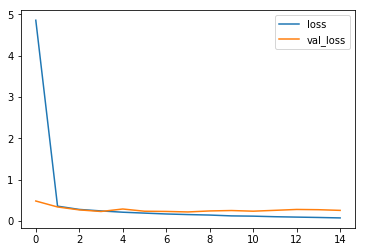

In [10]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

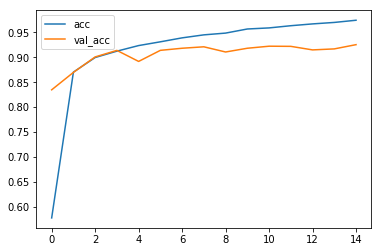

In [11]:
# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()